# IMPORTING LIBRARIES #

In [1]:
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
import datetime
import pickle


*READING IN THE DATASET*

In [2]:
df = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\SALES FORCAST DATSET.csv')
df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


*SHAPE OF DATASET*

In [ ]:
df.shape


(9800, 18)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

*DESCRIPTIVE STATISTICS*

In [ ]:
df.describe()


,Row ID,Postal Code,Sales
count,9800.00,9789.00,9800.00
mean,4900.50,55273.32,230.77
std,2829.16,32041.22,626.65
min,1.00,1040.00,0.44
25%,2450.75,23223.00,17.25
50%,4900.50,58103.00,54.49
75%,7350.25,90008.00,210.61
max,9800.00,99301.00,22638.48


*NULL VALUES*

In [ ]:
df.isna().sum()/len(df)*100


Row ID          0.00
Order ID        0.00
Order Date      0.00
Ship Date       0.00
Ship Mode       0.00
Customer ID     0.00
Customer Name   0.00
Segment         0.00
Country         0.00
City            0.00
State           0.00
Postal Code     0.11
Region          0.00
Product ID      0.00
Category        0.00
Sub-Category    0.00
Product Name    0.00
Sales           0.00
dtype: float64

In [3]:
df['Postal Code'].fillna(df['Postal Code'].mode()[0], inplace=True)  # filling the missing values


C:\Users\USER\AppData\Local\Temp\ipykernel_2092\2309781210.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(df['Postal Code'].mode()[0], inplace=True)  # filling the missing values


In [4]:
df.duplicated().sum()   # duplicated rows


0

In [ ]:
df.columns   # columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

*REMOVING OUTLIERS IN THE DATASET*

In [5]:
from scipy.stats import zscore

df['Sales_zscore'] = zscore(df['Sales'])
df = df[df['Sales_zscore'].abs()<=3]


*HISTOGRAM REPRESENTATION OF SALES DATA*

<Axes: >

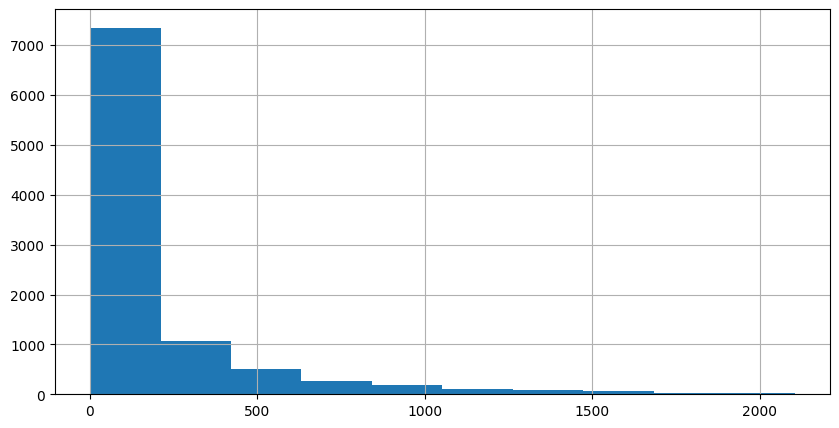

In [ ]:
df['Sales'].hist(bins=10, figsize=(10, 5))


In [6]:
from IPython.display import Markdown, display


In [7]:
def printmd(string):
    display(Markdown(string))


*COUNT OF ITEMS PURCHASED THROUGH EACH SHIP MODE*

        Ship Mode  count
0  Standard Class   5788
1    Second Class   1877
2     First Class   1481
3        Same Day    531


the shipmode that was most used by the customers was the **STANDARD CLASS** which was used about **5,788**

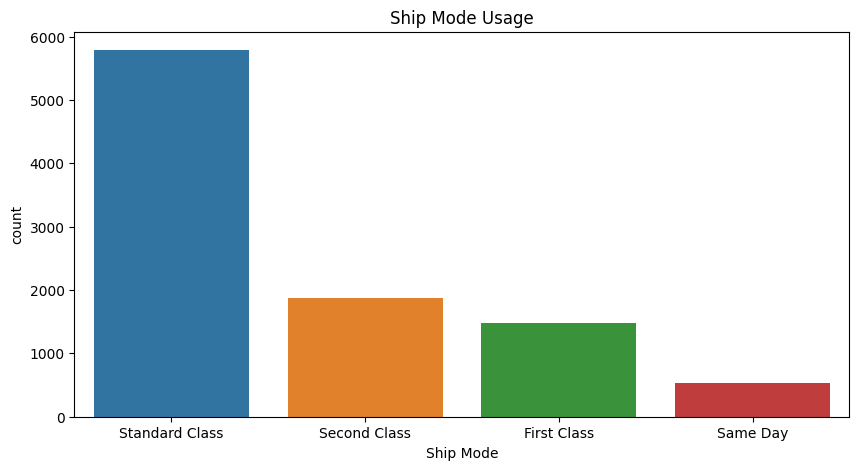

In [8]:
df_ship_mode = df['Ship Mode'].value_counts().reset_index()
print(df_ship_mode)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_ship_mode, x = 'Ship Mode', y='count',hue = 'Ship Mode' )
plt.title('Ship Mode Usage')
printmd(f'the shipmode that was most used by the customers was the **STANDARD CLASS** which was used about **5,788**')


*REVENUE THAT EACH SHIP MODE GENERATED*

        Ship Mode      Sales
0  Standard Class 1041468.86
1    Second Class  350717.17
2     First Class  264204.28
3        Same Day  100217.06


the shipmode that generated the most revenue was the **STANDARD CLASS** that gained about **1,0414,68** in revenue

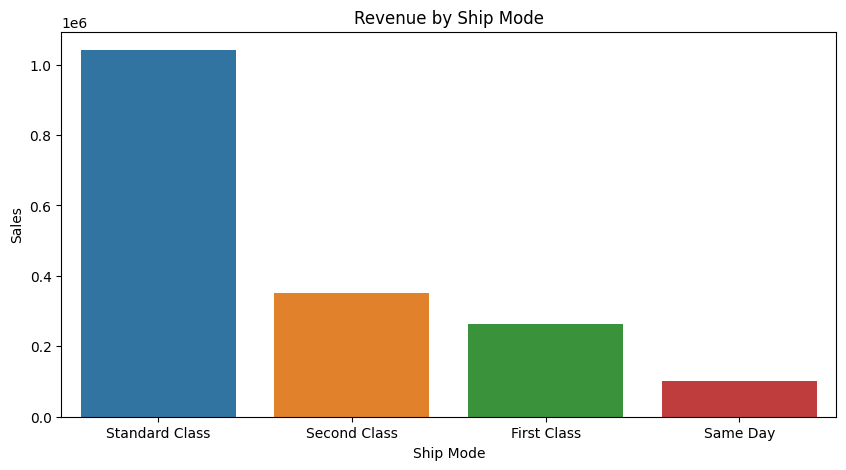

In [ ]:
df_ShipMode_sale = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False).reset_index()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(df_ShipMode_sale)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_ShipMode_sale, x='Ship Mode', y='Sales', hue='Ship Mode')
plt.title('Revenue by Ship Mode')
printmd('the shipmode that generated the most revenue was the **STANDARD CLASS** that gained about **1,0414,68** in revenue')


*COUNT OF SALES MADE TO EACH SEGMENT*

       Segment  count
0     Consumer   5041
1    Corporate   2917
2  Home Office   1719


The segment that most items belonged to was the **CONSUMER SEGMENT** which was about **5,041** items

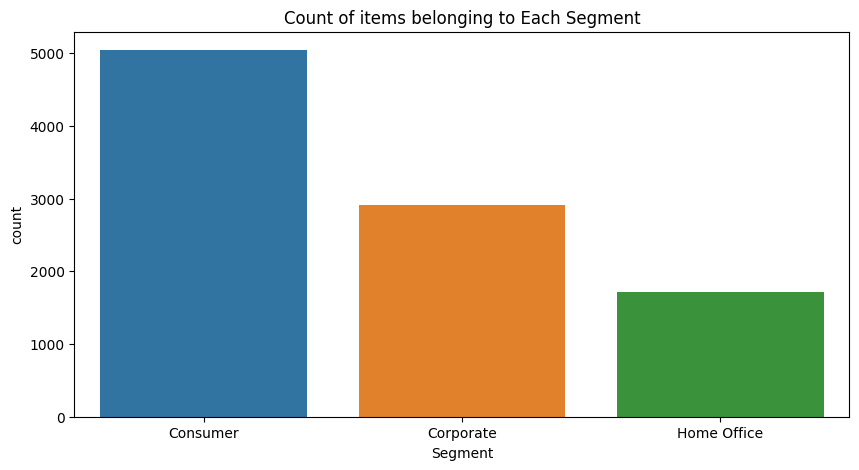

In [ ]:
df_Segment = df['Segment'].value_counts().reset_index()
print(df_Segment)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_Segment, x = 'Segment', y='count',hue = 'Segment' )
plt.title('Count of items belonging to Each Segment')

printmd('The segment that most items belonged to was the **CONSUMER SEGMENT** which was about **5,041** items')


*REVENUE GENERATED BY EACH SEGMENT*

       Segment     Sales
0     Consumer 896586.78
1    Corporate 545725.00
2  Home Office 314295.59


The segment that generated the most revenue was the **CONSUMER SEGMENT** which was about **$896,586** items

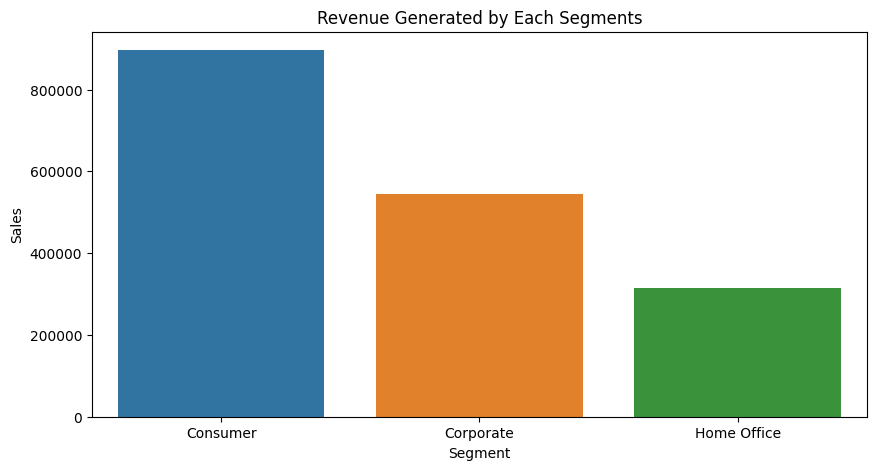

In [ ]:
df_Segment = df.groupby('Segment')['Sales'].sum().reset_index()

pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(df_Segment)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_Segment, x='Segment', y='Sales', hue='Segment')
plt.title('Revenue Generated by Each Segments')
printmd('The segment that generated the most revenue was the **CONSUMER SEGMENT** which was about **$896,586** items')


*CITY WITH MOST COUNT OF ITEMS ON THE SHIP*

              City  count
0    New York City    868
1      Los Angeles    716
2     Philadelphia    528
3    San Francisco    497
4          Seattle    419
..             ...    ...
524    Port Orange      1
525       Waterloo      1
526       Missoula      1
527  Lake Elsinore      1
528     Springdale      1

[529 rows x 2 columns]


The City that most items belonged to was the **New York City** which was about **868** items

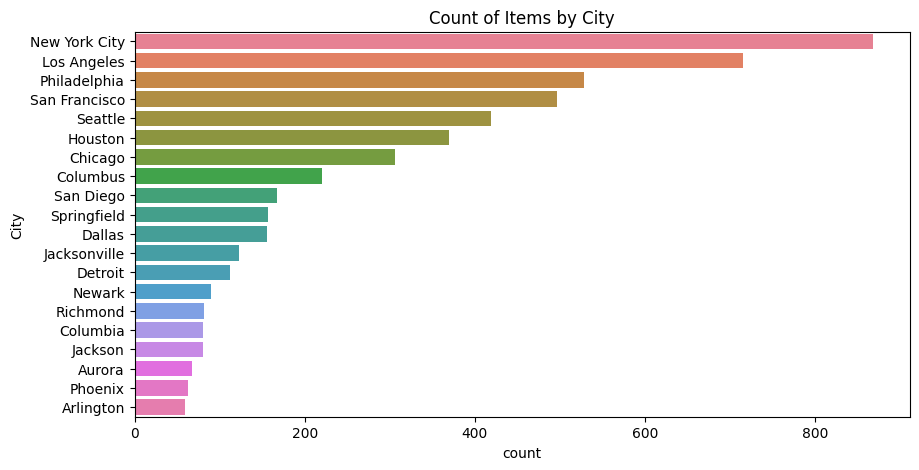

In [ ]:
df_city = df['City'].value_counts().reset_index()
print(df_city)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_city[:20], y = 'City', x='count',hue = 'City' )
plt.title('Count of Items by City')
printmd('The City that most items belonged to was the **New York City** which was about **868** items')


*REVENUE GENERATED BY SALES OF EACH CITY*

              City     Sales
0    New York City 165554.67
1      Los Angeles 137310.85
2    San Francisco  91140.90
3     Philadelphia  88278.43
4          Seattle  85747.80
..             ...       ...
524   Ormond Beach      2.81
525      Pensacola      2.21
526        Jupiter      2.06
527         Elyria      1.82
528        Abilene      1.39

[529 rows x 2 columns]


The City that Generated the most Revenue was **New York City** which was about **$165,554.67** in revenue

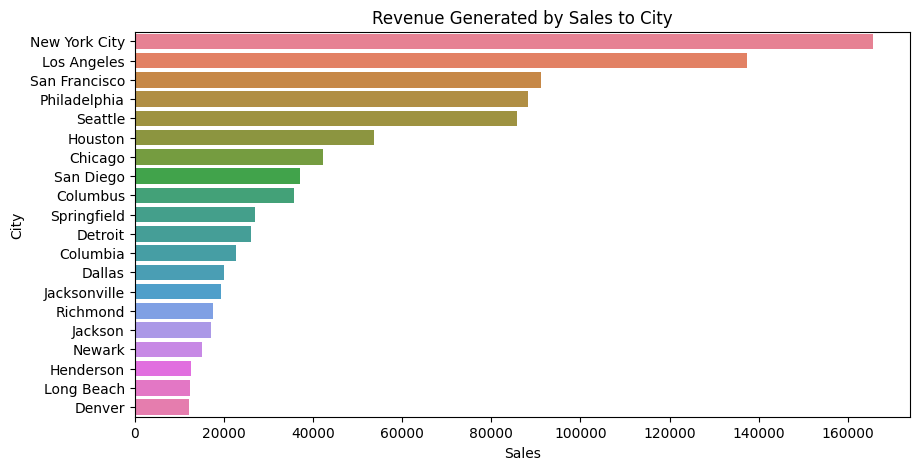

In [ ]:
df_City_Sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index()
print(df_City_Sales)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_City_Sales[:20], x='Sales', y='City', hue='City')
plt.title('Revenue Generated by Sales to City')
printmd('The City that Generated the most Revenue was **New York City** which was about **$165,554.67** in revenue')


*COUNT OF SALES MADE TO EACH STATE*

             State  count
0       California   1923
1         New York   1070
2            Texas    965
3     Pennsylvania    578
4       Washington    496
5         Illinois    481
6             Ohio    453
7          Florida    370
8         Michigan    248
9   North Carolina    244
10         Arizona    223
11        Virginia    218
12       Tennessee    181
13        Colorado    178
14         Georgia    173
15   Massachusetts    135
16        Kentucky    134
17         Indiana    133
18          Oregon    122
19      New Jersey    118


The State that Generated the most Sales was made to was **Califonia** which was about **1,923** in revenue

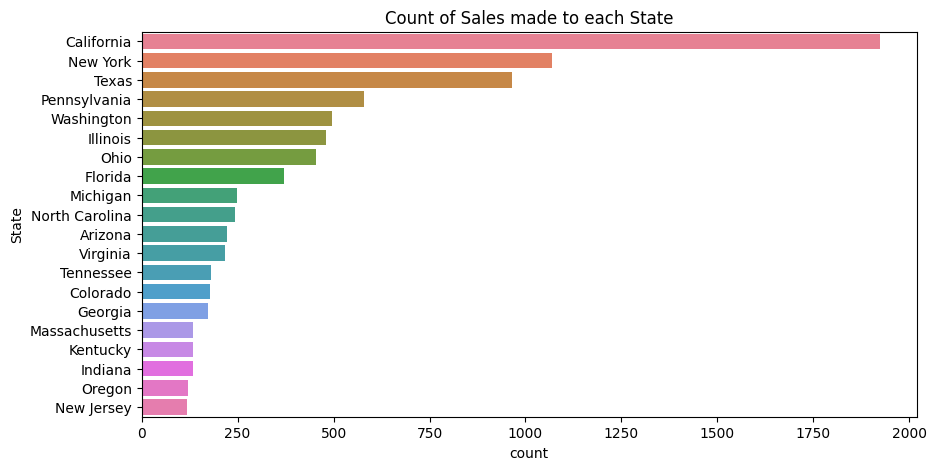

In [ ]:
df_State = df['State'].value_counts().reset_index()
print(df_State.head(20))
plt.figure(figsize=(10, 5))
sns.barplot(data=df_State[:20], y = 'State', x='count',hue = 'State' )
plt.title('Count of Sales made to each State')

printmd('The State that Generated the most Sales was made to was **Califonia** which was about **1,923** in revenue')


*REVENUE GENERATED BY STATES*

                   State     Sales
0             California 365159.08
1               New York 203843.91
2                  Texas 141475.33
3             Washington 102182.71
4           Pennsylvania  95713.33
5               Illinois  73700.60
6                   Ohio  70630.37
7                Florida  58626.24
8               Michigan  50421.52
9               Virginia  46986.88
10        North Carolina  40243.36
11               Arizona  35272.66
12               Georgia  33233.31
13              Colorado  29291.61
14         Massachusetts  28634.43
15              Kentucky  28554.66
16               Indiana  28539.51
17             Wisconsin  28365.59
18             Tennessee  26107.82
19              Maryland  21163.54
20              Oklahoma  19683.39
21            New Jersey  18139.46
22             Minnesota  17845.36
23                Oregon  17284.46
24          Rhode Island  17125.12
25               Alabama  16470.64
26              Delaware  13888.70
27           Connect

The State that Generated the most Revenue was **Califonia** which was about **$365,159.08** in revenue

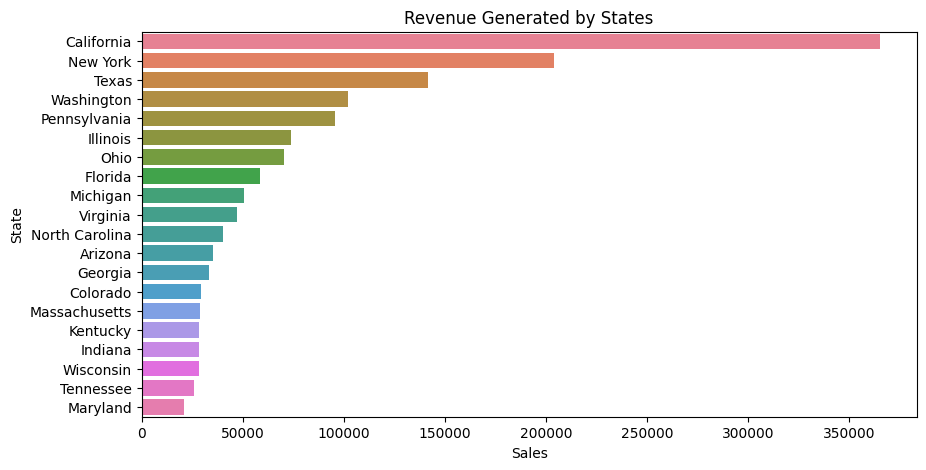

In [ ]:
df_State_Sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()
print(df_State_Sales)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_State_Sales[:20], x='Sales', y='State', hue='State')
plt.title('Revenue Generated by States')

printmd('The State that Generated the most Revenue was **Califonia** which was about **$365,159.08** in revenue')


*COUNT OF ITEMS BELONGING TO EACH REGION*

    Region  count
0     West   3105
1     East   2743
2  Central   2254
3    South   1575


The Reion that has the most item was the **WESTERN** part of the country which was about **3,105**

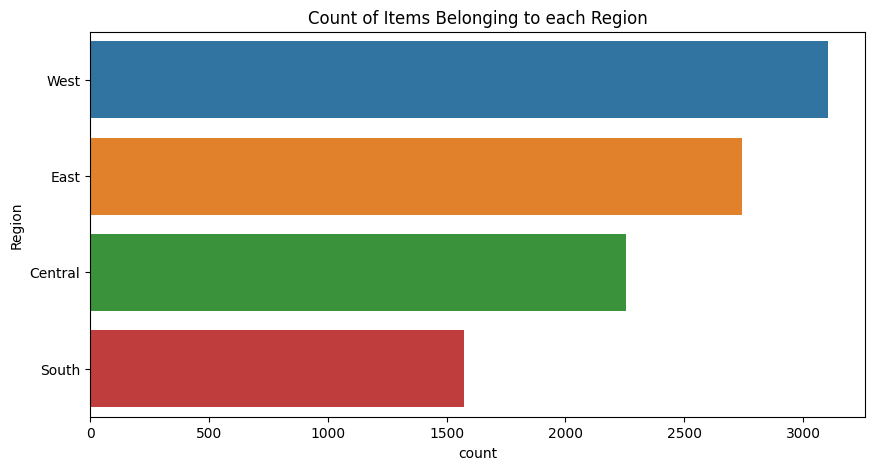

In [ ]:
df_Region = df['Region'].value_counts().reset_index()
print(df_Region.head(20))
plt.figure(figsize=(10, 5))
sns.barplot(data=df_Region[:20], y = 'Region', x='count',hue = 'Region')
plt.title('Count of Items Belonging to each Region')
printmd('The Reion that has the most item was the **WESTERN** part of the country which was about **3,105**')


*REGION THAT GENERATED THE MOST SALES*

    Region     Sales
0     West 583565.86
1     East 497435.68
2  Central 387750.79
3    South 287855.05


The Region that Generated the most Revenue was **WESTERN** part of the country which was about **$583,565.86** in revenue

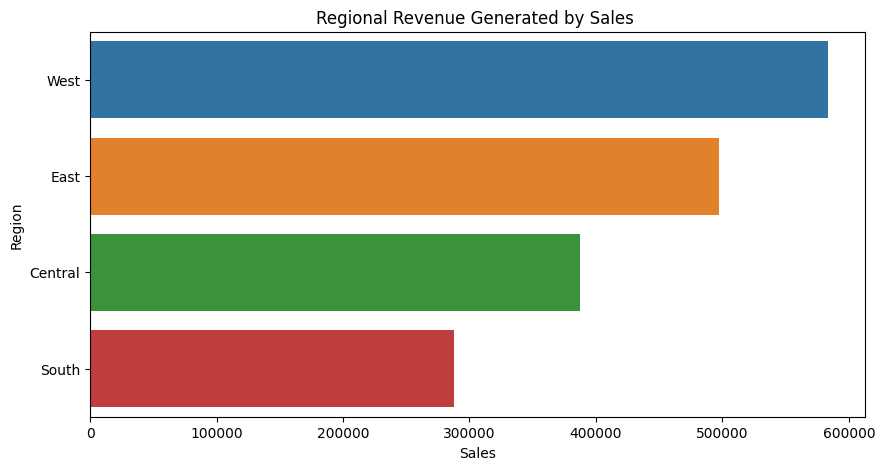

In [ ]:
df_Region_Sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()
print(df_Region_Sales)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_Region_Sales[:20], x='Sales', y='Region', hue='Region')
plt.title('Regional Revenue Generated by Sales ')

printmd('The Region that Generated the most Revenue was **WESTERN** part of the country which was about **$583,565.86** in revenue')


*COUNT OF ITEMS IN EACH CATEGORY*

          Category  count
0  Office Supplies   5880
1        Furniture   2046
2       Technology   1751


The Category that has the most count of items is **Office Supplies** which was about **5,880**

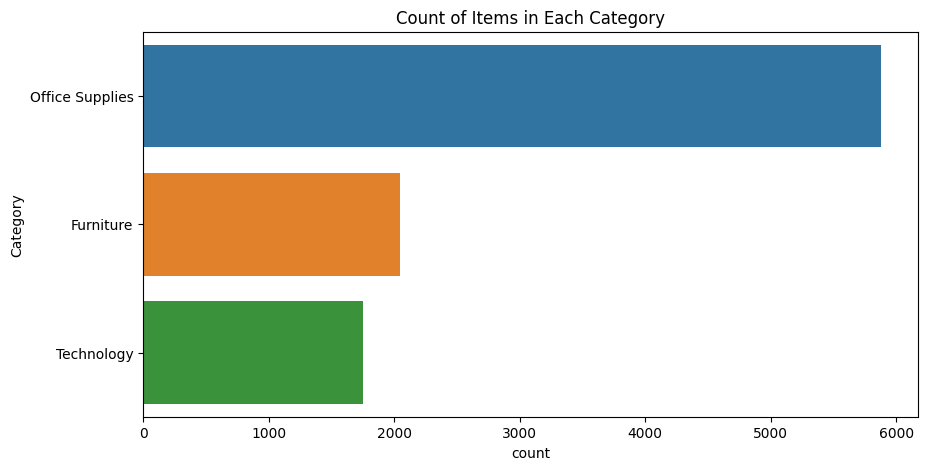

In [ ]:
df_category = df['Category'].value_counts().reset_index()
print(df_category)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_category, y='Category', x='count', hue='Category')
plt.title('Count of Items in Each Category')

printmd('The Category that has the most count of items is **Office Supplies** which was about **5,880**')


*REVENUE GENERATED BY EACH CATEGORY*

          Category     Sales
0        Furniture 634097.34
1  Office Supplies 585243.91
2       Technology 537266.12


The Category that Generated the most Revenue was **Furniture** which was about **$634,097.34** in revenue though the count of sales was 3 times lower than office supplies

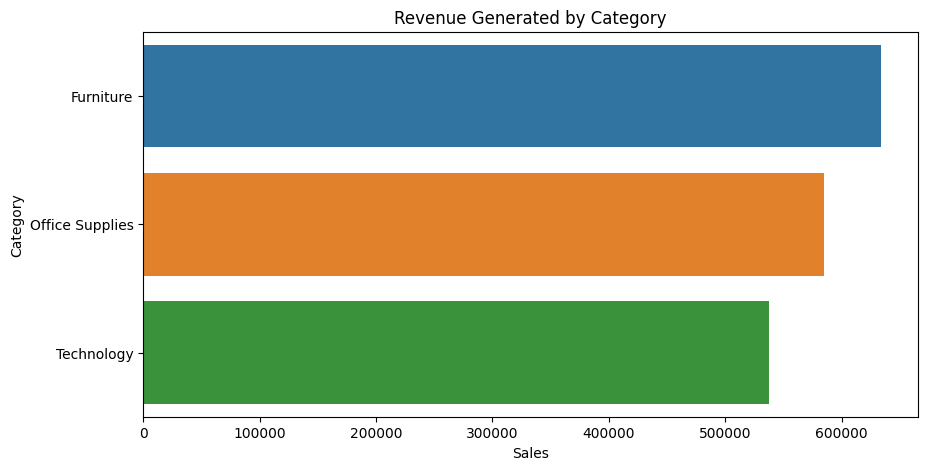

In [ ]:
df_cat_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()
print(df_cat_sales)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_cat_sales, x = 'Sales', y='Category', hue='Category')
plt.title('Revenue Generated by Category')

printmd('The Category that Generated the most Revenue was **Furniture** which was about **$634,097.34** in revenue though the count of sales was 3 times lower than office supplies')


*COUNT OF SALES BY SUB-CATEGORY*

   Sub-Category  count
0       Binders   1474
1         Paper   1338
2   Furnishings    931
3        Phones    864
4       Storage    830
5           Art    785
6   Accessories    752
7        Chairs    592
8    Appliances    456
9        Labels    357
10       Tables    304
11    Envelopes    248
12    Bookcases    219
13    Fasteners    214
14     Supplies    178
15     Machines     86
16      Copiers     49


The sub-category that has the most count of items **Blinders** which was about **1,474**

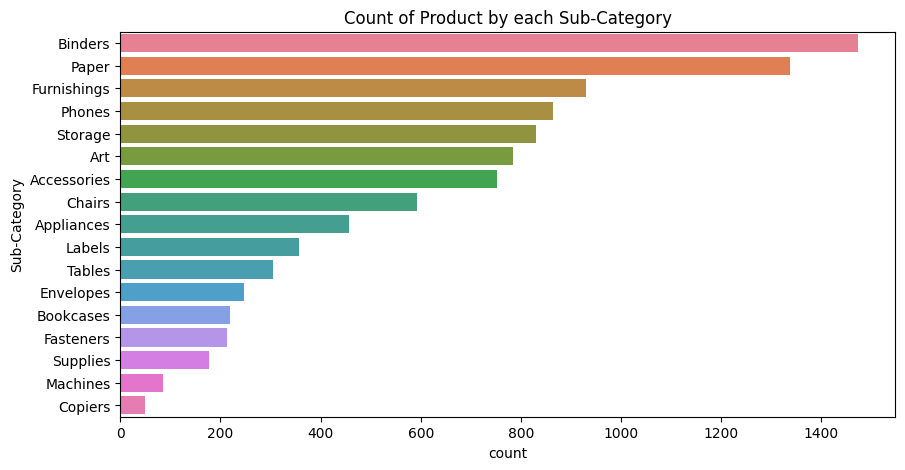

In [ ]:
df_sub_category = df['Sub-Category'].value_counts().reset_index()
print(df_sub_category)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_sub_category, y='Sub-Category', x='count', hue='Sub-Category')
plt.title('Count of Product by each Sub-Category')

printmd('The sub-category that has the most count of items **Blinders** which was about **1,474**')


*REVENUE GENERATED BY SUB-CATEGORY*

   Sub-Category     Sales
0        Phones 290531.69
1        Chairs 279697.30
2       Storage 213817.50
3        Tables 175057.52
4   Accessories 154029.86
5       Binders 123046.55
6    Appliances  96970.25
7     Bookcases  90130.50
8   Furnishings  89212.02
9         Paper  76828.30
10     Machines  46945.66
11      Copiers  45758.91
12          Art  26705.41
13     Supplies  16398.16
14    Envelopes  16128.05
15       Labels  12347.73
16    Fasteners   3001.96


The Sub-Category that Generated the most Revenue was **Phones** which was about **$290,531.69** in revenue

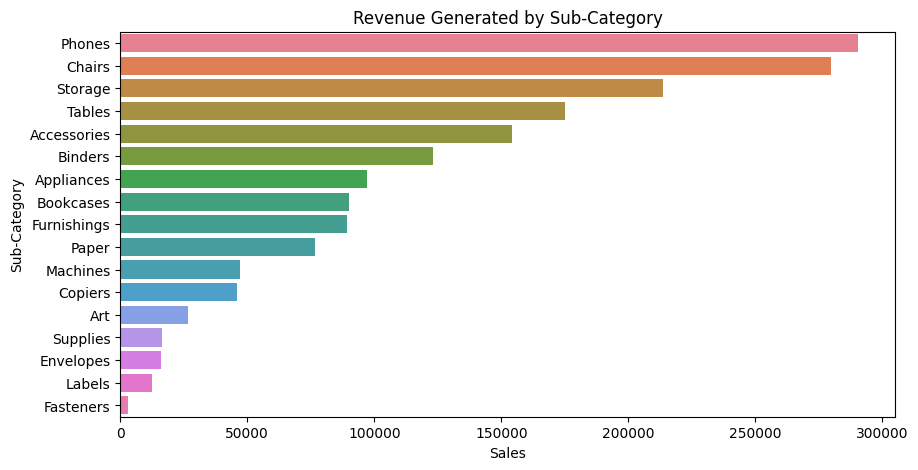

In [ ]:
df_subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index()
print(df_subcat_sales)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_subcat_sales, x = 'Sales', y='Sub-Category', hue='Sub-Category')
plt.title('Revenue Generated by Sub-Category')

printmd('The Sub-Category that Generated the most Revenue was **Phones** which was about **$290,531.69** in revenue')


*TOP CUSTOMERS*

        Customer Name   Sales
0         Clay Ludtke 8331.99
1    Natalie Fritzler 8080.47
2    Zuschuss Carroll 8025.71
3    Jonathan Doherty 7610.86
4          Brian Moss 7294.19
..                ...     ...
788   Mitch Gastineau   16.74
789      Carl Jackson   16.52
790        Sung Chung   14.11
791      Lela Donovan    5.30
792     Thais Sissman    4.83

[793 rows x 2 columns]


The Customer that spent the highest was  **CLAY LUDTKE** which was about **$8,331.99** in revenue

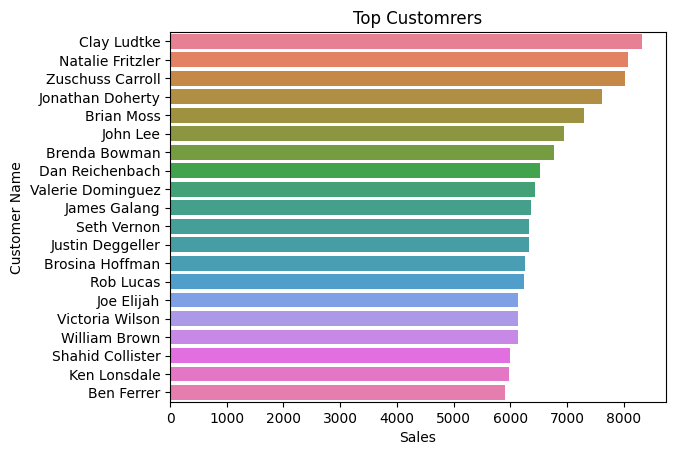

In [ ]:
c_name = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).reset_index()
print(c_name)
sns.barplot(data=c_name[:20], x='Sales', y='Customer Name', hue='Customer Name')
plt.title('Top Customrers')

printmd('The Customer that spent the highest was  **CLAY LUDTKE** which was about **$8,331.99** in revenue')


*TOP PRODUCTS BY REVENUE*

                                           Product Name      Sales
0                              SAFCO Arco Folding Chair  11572.780
1            GBC DocuBind TL300 Electric Binding System  10674.181
2     Hon Deluxe Fabric Upholstered Stacking Chairs,...  10637.528
3                 Tennsco 6- and 18-Compartment Lockers  10076.460
4                           Tennsco Double-Tier Lockers   9630.856
...                                                 ...        ...
1828                  Acme Serrated Blade Letter Opener      7.632
1829                                Grip Seal Envelopes      7.072
1830                                           Xerox 20      6.480
1831                                            Avery 5      5.760
1832  Eureka Disposable Bags for Sanitaire Vibra Gro...      1.624

[1833 rows x 2 columns]


the best product item by sales revenue generated was SAFCO Arco Folding Chair which was about **$11,572.780** in revenue

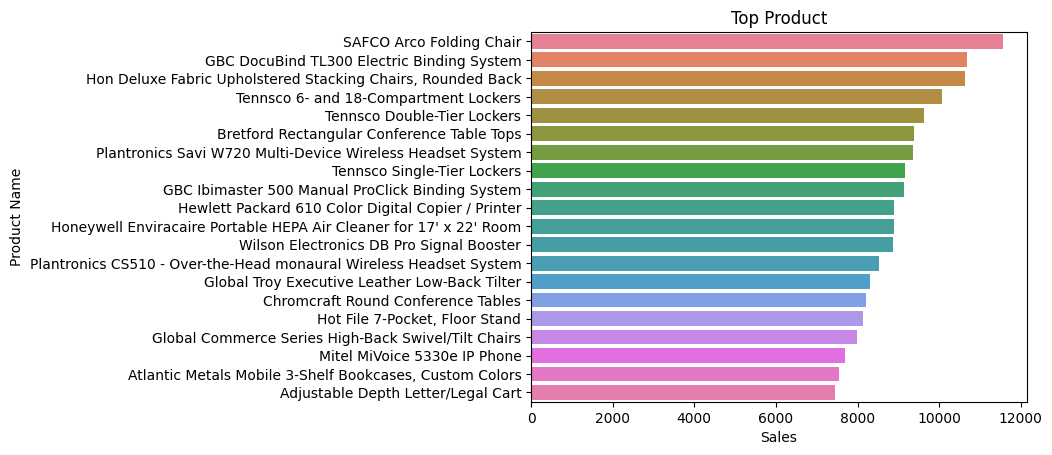

In [52]:
p_name = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).reset_index()
print(p_name)
sns.barplot(data=p_name[:20], x='Sales', y='Product Name', hue='Product Name')
plt.title('Top Product')
printmd("the best product item by sales revenue generated was SAFCO Arco Folding Chair which was about **$11,572.780** in revenue")


*COUNT OF PRODUCT SALES*

                                         Product Name  Sales
0                                     Staple envelope     47
1                                             Staples     46
2                                   Easy-staple paper     44
3                             Avery Non-Stick Binders     20
4                             Staples in misc. colors     18
5                                      Staple remover     18
6                             Storex Dura Pro Binders     17
7                          KI Adjustable-Height Table     17
8                          Staple-based wall hangings     16
9   Logitech 910-002974 M325 Wireless Mouse for We...     15
10         Situations Contoured Folding Chairs, 4/Set     15
11                        Eldon Wave Desk Accessories     14
12          Global High-Back Leather Tilter, Burgundy     14
13    Global Wood Trimmed Manager's Task Chair, Khaki     14
14  GBC Premium Transparent Covers with Diagonal L...     14
15                      

<Axes: ylabel='Product Name'>

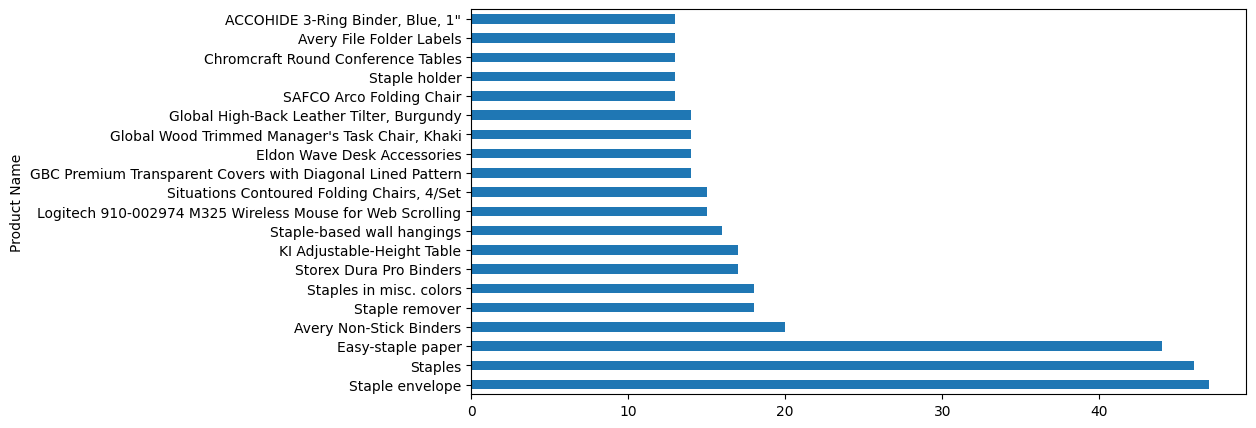

In [62]:
p_name = df.groupby('Product Name')['Sales'].count().sort_values(ascending=False).reset_index()
print(p_name.head(30))
df['Product Name'].value_counts().head(20).plot(kind='barh', figsize=(10, 5))


*CHECKING FOR ANY SIGNIFICANT DIFFERENCE BETWEEN SEGMENTS SALES*

In [ ]:
df['Product Name'].nunique()


1833

In [9]:
consumer_sales = df[df['Segment']=='Consumer']['Sales']
coperate_sales = df[df['Segment']=='Corporate']['Sales']

t_stat, p_value = stats.ttest_ind(consumer_sales, coperate_sales)
print(f'T_statistics : {t_stat}, P_value : {p_value}')
printmd('There is no difference between sales made to consumers and corporate as the p_value is bigger than 0.05 threshold')


T_statistics : -1.304199966525017, P_value : 0.1922031403507254


There is no difference between sales made to consumers and corporate as the p_value is bigger than 0.05 threshold

*RENAMING THE SHIP MODE*

In [10]:
df.rename({"Ship Mode":'Ship_Mode'},axis=1, inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_2092\483229907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({"Ship Mode":'Ship_Mode'},axis=1, inplace=True)


*SPLITTING THE DATSET FOR MODEL*

In [11]:
features = ['Segment', 'Ship_Mode', 'Category', 'Region', 'City', 'State']
X_train = df[features]
target = 'Sales'
y_train = df[target]
print('the shape of X_train :', X_train.shape)
print('the shape of y_train :', y_train.shape)


the shape of X_train : (9677, 6)
the shape of y_train : (9677,)


In [12]:
y_train


0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9795      3.7980
9796     10.3680
9797    235.1880
9798     26.3760
9799     10.3840
Name: Sales, Length: 9677, dtype: float64

In [13]:
y_mean = y_train.mean()  #target column average sale
y_pred_baseline = [y_mean] * len(y_train)    # y_train baseline
print('the Y_pred_baseline :', y_pred_baseline[:3])
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)   # calculating the mean absolute error for the baseline
print('the mae baseline :', mae_baseline)
print('the Average Sales :', y_mean)


the Y_pred_baseline : [181.5239612586545, 181.5239612586545, 181.5239612586545]
the mae baseline : 198.5064462310131
the Average Sales : 181.5239612586545


*MODEL BUILDING*

In [14]:
model = make_pipeline(
    OneHotEncoder(),
    LinearRegression()
)
model.fit(X_train, y_train)


Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('linearregression', LinearRegression())])

*COEFFICIENT AND INTERCEPT*

In [ ]:
coefficients = model.named_steps['linearregression'].coef_.round(2)  
intercept = model.named_steps['linearregression'].intercept_.round(2)

print('the coefficient :', coefficients)
print('the intercept :', intercept)


*FEATURE IMPORTANCE*

<Axes: >

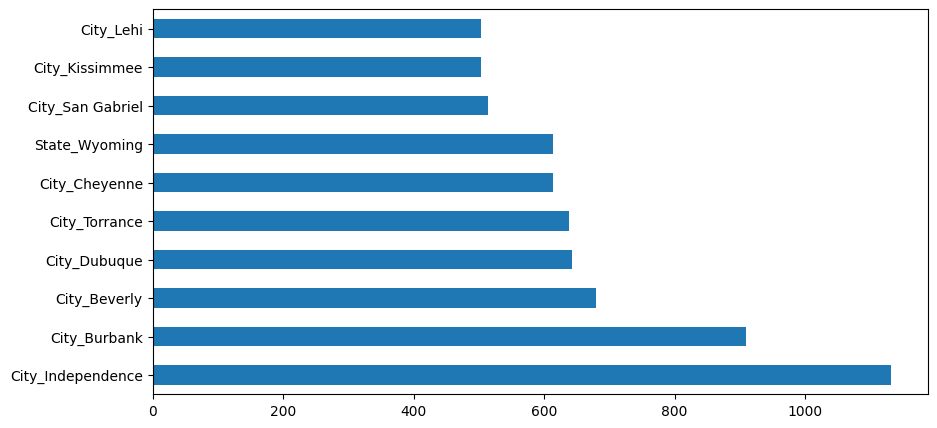

In [16]:
features = model.named_steps['onehotencoder'].get_feature_names_out()
feat_imp = pd.Series(coefficients, index=features).sort_values(ascending=False)
feat_imp.head(10).sort_values(ascending=False).plot(kind='barh', figsize=(10, 5))


*MEAN ABSOLUTE ERROR FPR TRAINING SET*

In [17]:
y_pred_train = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
print(mae)


170.551727434599


*MAKE PREDICTIONS*

In [18]:
def make_prediction(Segment, Ship_Mode, Category, Region, City, State):
    data = {
        'Segment': Segment,
        'Ship_Mode' : Ship_Mode,
        'Category' : Category,
        'Region': Region,
        'City' : City,
        'State': State
    } 
    
    df = pd.DataFrame(data, index=[0])
    
    prediction = model.predict(df)
    return f"Predicted Shipping  price: ${prediction}"


*INPUT PREDICTION PARAMETERS*

In [19]:
make_prediction("Consumer", "Standard Class", "Furniture", "South", "Henderson", 'Kentucky')


'Predicted Shipping  price: $[371.13353467]'

In [ ]:
pickle.dump(model, open('sales_prediction_model.pkl', 'wb'))  # saving the model


C:\Users\USER\AppData\Local\Temp\ipykernel_2092\3580840750.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
C:\Users\USER\AppData\Local\Temp\ipykernel_2092\3580840750.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_index(inplace=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


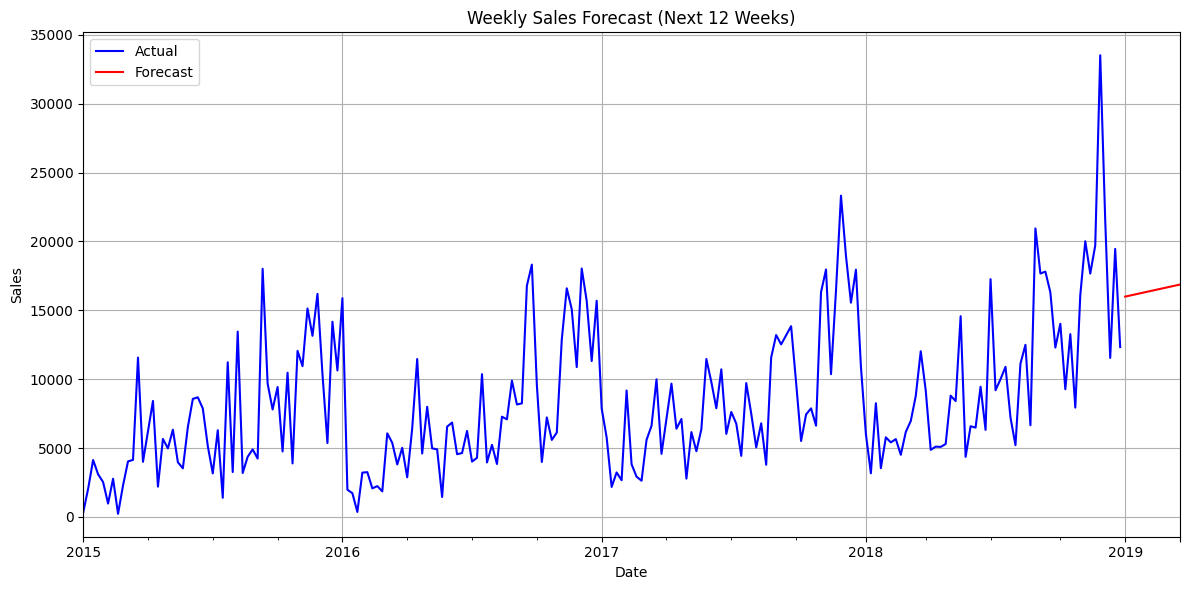

C:\Users\USER\AppData\Local\Temp\ipykernel_2092\3580840750.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_resampled = series.resample(freq).sum()
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


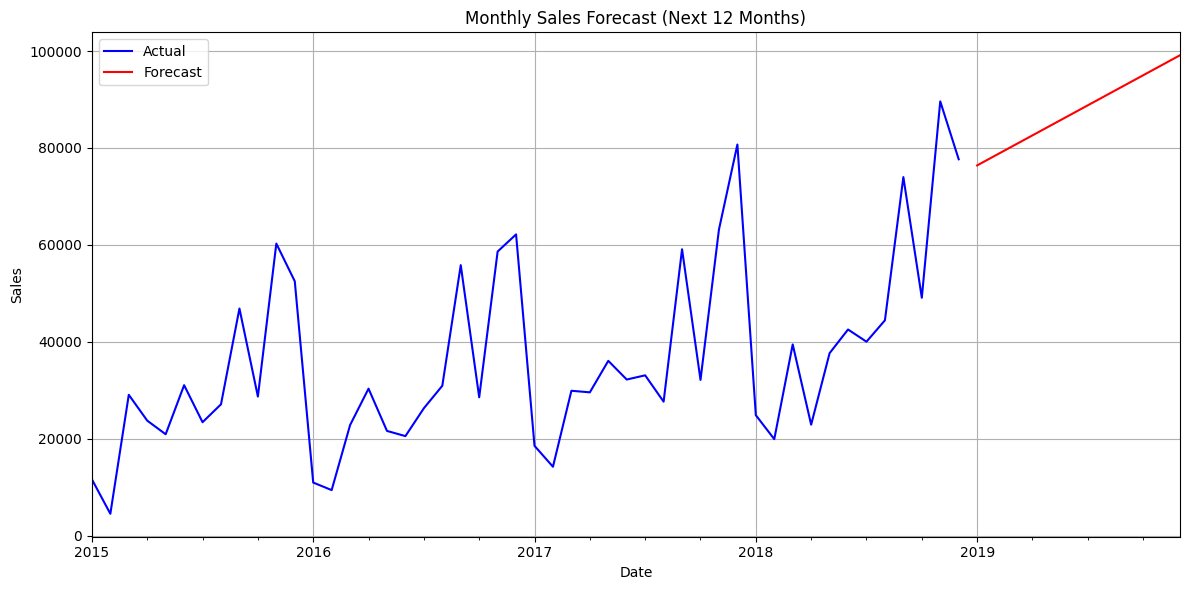

C:\Users\USER\AppData\Local\Temp\ipykernel_2092\3580840750.py:21: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sales_resampled = series.resample(freq).sum()
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


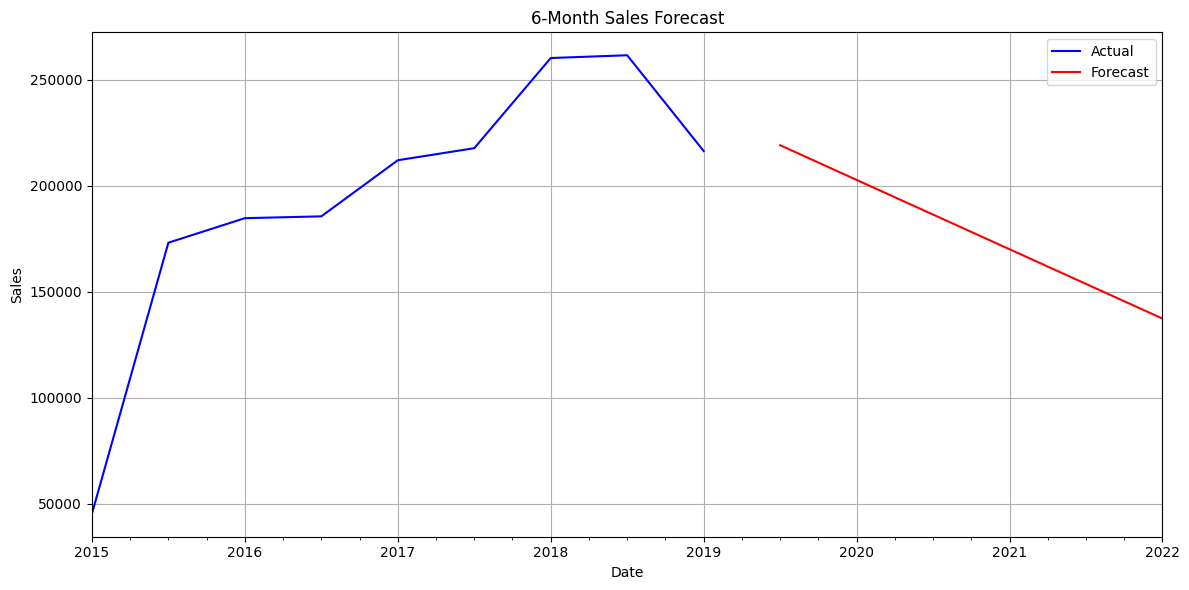

C:\Users\USER\AppData\Local\Temp\ipykernel_2092\3580840750.py:21: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sales_resampled = series.resample(freq).sum()
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


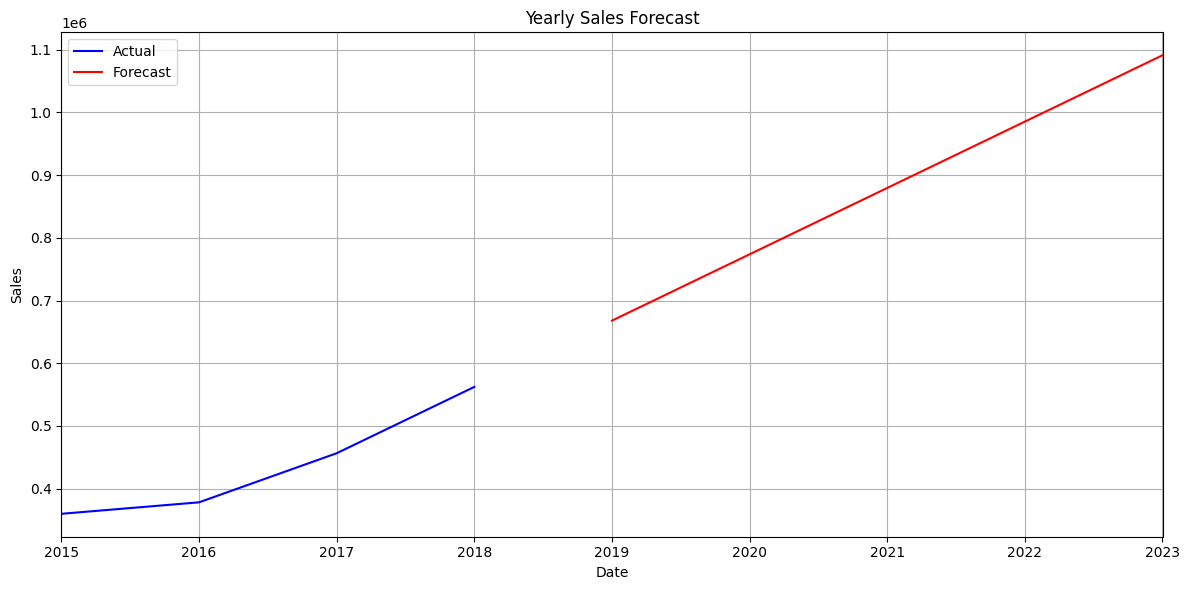

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Set date as index
df.set_index('Order Date', inplace=True)

# Sort by date
df.sort_index(inplace=True)

# Aggregate sales over daily level (can resample after)
daily_sales = df['Sales'].resample('D').sum()

# Function to forecast and plot
def forecast_sales(series, freq='W', periods=12, title=''):
    # Resample sales
    sales_resampled = series.resample(freq).sum()

    # Fit Holt-Winters Model
    model = ExponentialSmoothing(sales_resampled, trend='add', seasonal=None)
    fitted_model = model.fit()

    # Forecast
    forecast = fitted_model.forecast(periods)

    # Plot
    plt.figure(figsize=(12,6))
    sales_resampled.plot(label='Actual', color='blue')
    forecast.plot(label='Forecast', color='red')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Weekly Forecast (Next 12 weeks)
forecast_sales(daily_sales, freq='W', periods=12, title='Weekly Sales Forecast (Next 12 Weeks)')

# Monthly Forecast (Next 12 months)
forecast_sales(daily_sales, freq='M', periods=12, title='Monthly Sales Forecast (Next 12 Months)')

# 6-Month Forecast (Next 6 half-years)
forecast_sales(daily_sales, freq='2Q', periods=6, title='6-Month Sales Forecast')

# Yearly Forecast (Next 5 years)
forecast_sales(daily_sales, freq='Y', periods=5, title='Yearly Sales Forecast')
